In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from Explorer import Explorer

- need to plot the stats
- need to cluster the stats
- need to find similar clusters 
- need to be able to put a different cut dataframe into all of these

# 1. Setup the data:

In [3]:
census_data = Explorer("./USCensus_ACS_5yr_2019_Modified.csv", skip_rows=[0, 2])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


### View the dataframe:

In [4]:
df = census_data.getDataFrame()
df.head()

,Division,PersonNumber,Region,State,Age,Citizenship,YearNaturalization,ClassOfWorker,SelfCareDiff,HearingDiff,...,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
0,3,1,2,55,57,1,NaN,6.0,2.0,2,...,3,4.0,16.0,1,0.0,8.0,1,73.0,31.0,16400.0
1,3,2,2,55,30,1,NaN,1.0,2.0,2,...,5,4.0,20.0,1,37300.0,40.0,2,90.0,49.0,37300.0
2,3,3,2,55,55,1,NaN,1.0,2.0,2,...,3,4.0,16.0,2,7200.0,16.0,2,219.0,127.0,7200.0
3,3,1,2,55,76,1,NaN,NaN,2.0,2,...,1,4.0,16.0,1,0.0,NaN,1,NaN,NaN,32200.0
4,3,2,2,55,72,1,NaN,NaN,2.0,2,...,1,4.0,16.0,2,0.0,NaN,1,NaN,NaN,12200.0


# 2. Correlations:

## a. You know what correlation you want to look at: 

### Return the correlation value of the two columns:

In [5]:
census_data.getCorrelation('Age', 'EducationAttainment')

(0.524380421103229, 0.0)

### Plot the Corralation data:

Pearson's correlation coefficent: r = 0.52438


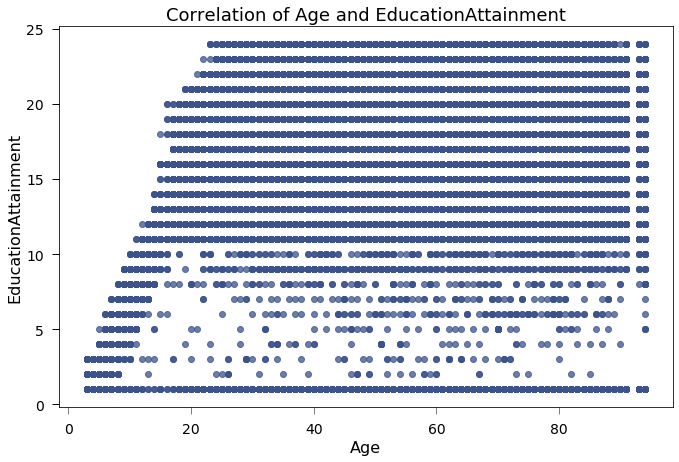

In [6]:
census_data.plotCorrelation('Age', 'EducationAttainment')

## b. You want to explore the correlations of all pairs:

### Calculate and plot the correlation matrix:

In [7]:
correlationMatrix = census_data.getCorrelationMatrix()
correlationMatrix

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Division,PersonNumber,Region,State,Age,Citizenship,YearNaturalization,ClassOfWorker,SelfCareDiff,HearingDiff,...,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PersonNumber,NaN,1.000000,NaN,NaN,-0.592659,0.001400,0.188039,-0.072643,0.056644,0.093283,...,0.478547,0.092434,-0.571533,0.008692,-0.102739,-0.147591,0.054977,0.093415,0.094432,-0.166733
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,-0.592659,NaN,NaN,1.000000,-0.000648,-0.617403,0.164900,-0.185078,-0.231463,...,-0.673367,-0.241188,0.524380,0.033406,-0.098864,0.077450,-0.086460,-0.164776,-0.169289,0.099718
Citizenship,NaN,0.001400,NaN,NaN,-0.000648,1.000000,NaN,-0.017118,0.007616,0.014138,...,-0.033985,0.043178,-0.001288,0.004777,0.009654,0.013246,0.098047,0.020735,0.024290,-0.010402
YearNaturalization,NaN,0.188039,NaN,NaN,-0.617403,NaN,1.000000,-0.079152,0.145805,0.179860,...,0.183101,0.208971,-0.055709,-0.018844,0.152471,0.071913,0.107110,0.048531,0.047937,0.019830
ClassOfWorker,NaN,-0.072643,NaN,NaN,0.164900,-0.017118,-0.079152,1.000000,-0.011633,-0.033644,...,-0.124571,-0.047143,0.061558,-0.038505,-0.082154,0.068992,0.019969,-0.045576,-0.025354,0.058061
SelfCareDiff,NaN,0.056644,NaN,NaN,-0.185078,0.007616,0.145805,-0.011633,1.000000,0.143237,...,0.003393,0.037819,0.033476,-0.021471,0.110123,0.046345,0.032310,-0.006503,-0.008493,0.075678
HearingDiff,NaN,0.093283,NaN,NaN,-0.231463,0.014138,0.179860,-0.033644,0.143237,1.000000,...,0.099108,0.161347,-0.029841,0.057790,0.084941,0.022343,0.027785,0.012274,0.014048,0.019064


### Get the highest (and lowest) non trivial correlation pair:

In [8]:
census_data.getMaxCorrelation()

[('TimeOfWorkDeparture', 'TimeOfWorkArrival', 0.9712008412893816),
 ('MaritalStatus', 'Age', -0.6733670749093839)]

### Pull out all of the highest and lowest pairs above a threshold value:

In [9]:
census_data.getMaxCorrelation(threshold=.6)

[(['TotalIncome', 'TimeOfWorkDeparture', 'TimeOfWorkArrival', 'Wages'],
  ['Wages', 'TimeOfWorkArrival', 'TimeOfWorkDeparture', 'TotalIncome'],
  [0.8264503287513844,
   0.9712008412893816,
   0.9712008412893816,
   0.8264503287513844]),
 (['YearNaturalization', 'MaritalStatus', 'Age', 'Age'],
  ['Age', 'Age', 'YearNaturalization', 'MaritalStatus'],
  [-0.6174029237418879,
   -0.6733670749093839,
   -0.6174029237418879,
   -0.6733670749093839])]

Pearson's correlation coefficent: r = -0.673367


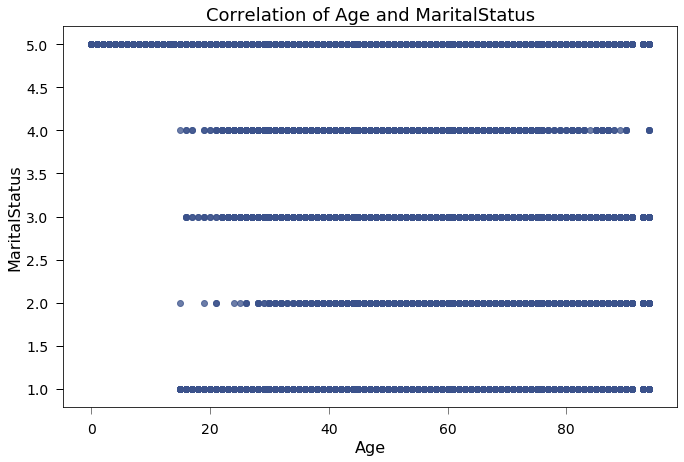

In [10]:
census_data.plotCorrelation('Age', 'MaritalStatus')

# 3. Distribution Statistics:

### List summary statistics for a column:

In [11]:
census_data.getSummaryStats("Age", printStats=True)

num:  295806 , range:  94 , mean:  42.785745 , variance:  568.507405 , skew:  -0.064215


(295806, 94, 42.78574471106063, 568.5074049738768, -0.06421526733986443)

### Plot the summary statistics:

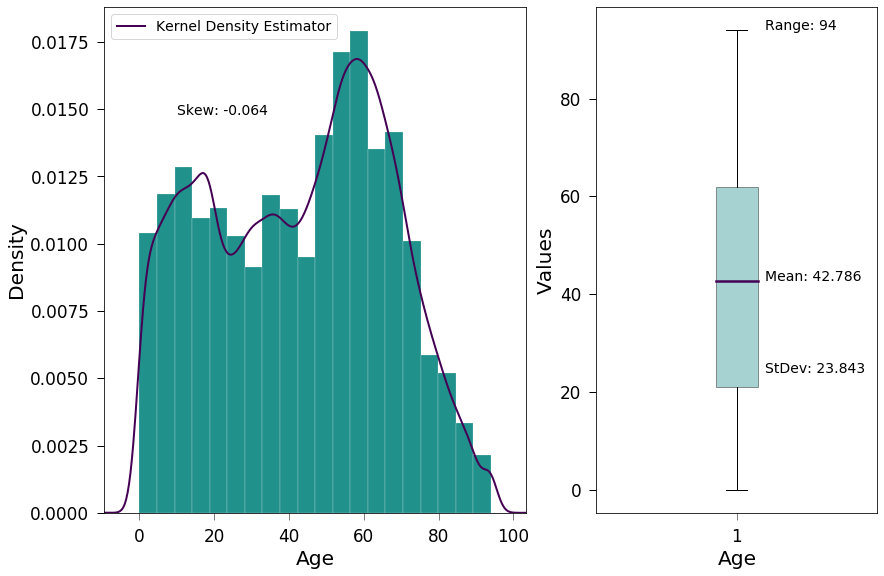

In [12]:
census_data.plotSummaryStats("Age", printStats=False)

### Create summary statistics for the whole dataframe:

In [13]:
summaryMatrix = census_data.getSummaryMatrix()
summaryMatrix

,counts,range,mean,variance,skew
Division,295806,0.0,3.000000,0.000000e+00,0.000000
PersonNumber,295806,17.0,2.009368,1.653647e+00,1.884099
Region,295806,0.0,2.000000,0.000000e+00,0.000000
State,295806,0.0,55.000000,0.000000e+00,0.000000
Age,295806,94.0,42.785745,5.685074e+02,-0.064215
Citizenship,295806,4.0,1.119883,3.931195e-01,5.278645
YearNaturalization,4712,75.0,1996.662139,2.961304e+02,-1.043889
ClassOfWorker,184928,8.0,2.060315,3.443290e+00,1.713416
SelfCareDiff,281362,1.0,1.965955,3.288616e-02,-5.138875
HearingDiff,295806,1.0,1.957168,4.099767e-02,-4.515718


### Plot the summary stats but compare to another column:

In [ ]:
census_data.plotSummaryStatsComparison("Age", "MaritalStatus", , printStats=False)

# 4. Clustering

In [14]:
clusters = census_data.printClusters(clusterdata='summary', ncomponents=7, reg_covar=.0001)
for cluster in clusters:
    print(cluster)
    print()

['Division', 'PersonNumber', 'Region', 'State', 'Age', 'Citizenship', 'SelfCareDiff', 'HearingDiff', 'VisionDiff', 'CognitiveDiff', 'MaritalStatus', 'EducationAttainment', 'Sex', 'HealthInsurance']

['Wages']

['TotalIncome']

['ClassOfWorker', 'HoursWorked']

['YearNaturalization', 'EnglishSpeaking', 'GaveBirthLastYear']

['MilitaryService']

['TravelTimeToWork', 'MeansOfTransportation', 'TimeOfWorkArrival', 'TimeOfWorkDeparture']



# 5. Selecting a Subset:

In [15]:
census_data_subset = Explorer("./USCensus_ACS_5yr_2019_Modified.csv", skip_rows=[0, 2])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [16]:
dfsub = census_data_subset.getDataFrame()
print(dfsub.columns)

Index(['Division', 'PersonNumber', 'Region', 'State', 'Age', 'Citizenship',
       'YearNaturalization', 'ClassOfWorker', 'SelfCareDiff', 'HearingDiff',
       'VisionDiff', 'CognitiveDiff', 'EnglishSpeaking', 'GaveBirthLastYear',
       'TravelTimeToWork', 'MeansOfTransportation', 'MaritalStatus',
       'MilitaryService', 'EducationAttainment', 'Sex', 'Wages', 'HoursWorked',
       'HealthInsurance', 'TimeOfWorkArrival', 'TimeOfWorkDeparture',
       'TotalIncome'],
      dtype='object')


In [17]:
df_subset = dfsub.drop(["Division", "Region", "State", "SelfCareDiff", "HearingDiff", "VisionDiff", "CognitiveDiff"], 1)
census_data_subset.setDataFrame(df_subset)
df_subset = census_data_subset.getDataFrame()
df_subset

,PersonNumber,Age,Citizenship,YearNaturalization,ClassOfWorker,EnglishSpeaking,GaveBirthLastYear,TravelTimeToWork,MeansOfTransportation,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
0,1,57,1,NaN,6.0,NaN,NaN,15.0,1.0,3,4.0,16.0,1,0.0,8.0,1,73.0,31.0,16400.0
1,2,30,1,NaN,1.0,NaN,NaN,10.0,1.0,5,4.0,20.0,1,37300.0,40.0,2,90.0,49.0,37300.0
2,3,55,1,NaN,1.0,NaN,NaN,25.0,1.0,3,4.0,16.0,2,7200.0,16.0,2,219.0,127.0,7200.0
3,1,76,1,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,16.0,1,0.0,NaN,1,NaN,NaN,32200.0
4,2,72,1,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,16.0,2,0.0,NaN,1,NaN,NaN,12200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295801,4,6,1,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,1,NaN,NaN,1,NaN,NaN,NaN
295802,5,4,1,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,2.0,2,NaN,NaN,1,NaN,NaN,NaN
295803,1,29,1,NaN,1.0,NaN,NaN,58.0,1.0,1,4.0,19.0,1,52000.0,40.0,1,57.0,13.0,52000.0
295804,2,29,1,NaN,1.0,NaN,2.0,1.0,1.0,1,4.0,16.0,2,35000.0,50.0,1,62.0,23.0,35000.0


In [18]:
summaryMatrix = census_data_subset.getSummaryMatrix()
summaryMatrix

,counts,range,mean,variance,skew
PersonNumber,295806,17.0,2.009368,1.653647e+00,1.884099
Age,295806,94.0,42.785745,5.685074e+02,-0.064215
Citizenship,295806,4.0,1.119883,3.931195e-01,5.278645
YearNaturalization,4712,75.0,1996.662139,2.961304e+02,-1.043889
ClassOfWorker,184928,8.0,2.060315,3.443290e+00,1.713416
EnglishSpeaking,16966,3.0,1.514971,6.488475e-01,1.432354
GaveBirthLastYear,57678,1.0,1.948091,4.921520e-02,-4.039713
TravelTimeToWork,136887,154.0,23.616903,4.708563e+02,3.121853
MeansOfTransportation,144884,11.0,1.988860,8.455720e+00,2.658817
MaritalStatus,295806,4.0,2.793517,3.440778e+00,0.226800


In [19]:
clusters = census_data_subset.printClusters(clusterdata='summary', ncomponents=7, reg_covar=.0001)
for cluster in clusters:
    print(cluster)
    print()

['TravelTimeToWork', 'MeansOfTransportation', 'TimeOfWorkArrival', 'TimeOfWorkDeparture']

['TotalIncome']

['Wages']

['PersonNumber', 'Age', 'Citizenship', 'MaritalStatus', 'EducationAttainment', 'Sex', 'HealthInsurance']

['YearNaturalization', 'EnglishSpeaking', 'GaveBirthLastYear']

['MilitaryService']

['ClassOfWorker', 'HoursWorked']



# 6. Normalizing a dataset:

In [1]:
from Explorer import Explorer

In [2]:
census_data_norm = Explorer("./USCensus_ACS_5yr_2019_Modified.csv", skip_rows=[0, 2])
dfn = census_data_norm.getDataFrame()
#dfn

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [3]:
for col in dfn:
    dfn[col] = dfn[col] / max(dfn[col])
    
census_data_norm.setDataFrame(dfn)
df_norm = census_data_norm.getDataFrame()
#df_norm

In [3]:
summaryMatrix = census_data_norm.getSummaryMatrix()
#summaryMatrix

In [4]:
summaryMatrix

,counts,range,mean,variance,skew
Division,295806,0.0,3.000000,0.000000e+00,0.000000
PersonNumber,295806,17.0,2.009368,1.653647e+00,1.884099
Region,295806,0.0,2.000000,0.000000e+00,0.000000
State,295806,0.0,55.000000,0.000000e+00,0.000000
Age,295806,94.0,42.785745,5.685074e+02,-0.064215
Citizenship,295806,4.0,1.119883,3.931195e-01,5.278645
YearNaturalization,4712,75.0,1996.662139,2.961304e+02,-1.043889
ClassOfWorker,184928,8.0,2.060315,3.443290e+00,1.713416
SelfCareDiff,281362,1.0,1.965955,3.288616e-02,-5.138875
HearingDiff,295806,1.0,1.957168,4.099767e-02,-4.515718


In [6]:
#clusters = census_data_norm.printClusters(clusterdata='summary', ncomponents=4, reg_covar=.0001)
#for cluster in clusters:
#    print(cluster)
#    print()

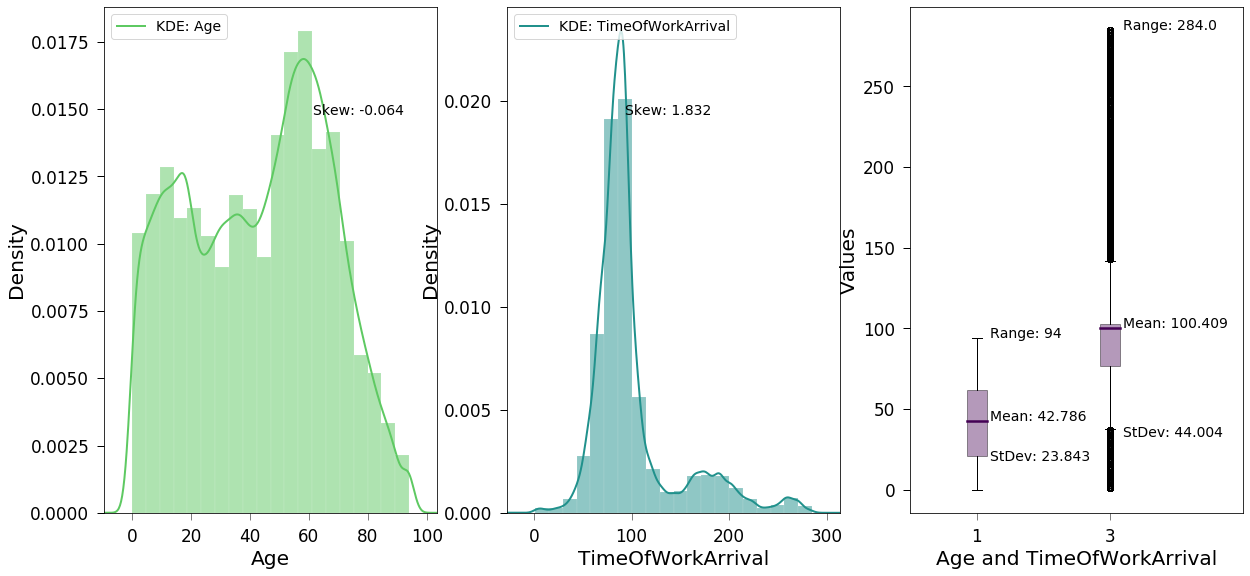

In [5]:
census_data_norm.plotSummaryStatsComparison("Age", "TimeOfWorkArrival", printStats=False)